### Tchebychev formulae ###

Just to show that we can build methods based on collocation.
Here we use Tchemychev polynomials. 
The formulas do not present any interesting application !

In [1]:
from sage.all import *
from rkkit import *


We must compute in exact numbers, generally algebraic numbers (AA if real, QQbar else).

In [2]:
R = PolynomialRing(AA,"x")
x=R.gen()

Build Chebyshev_T RK methods, find stability properties, compute order using rooted trees, draw stability function and order star.

*Z!* Computing order with rooted trees is very expensive when n grows!


Nom : Chebychev-T-3
A-stable:  True
L-stable:  False
order:  4
stability functions:  (-1.000000000000000?*z^3 - 18.00000000000000?*z^2 - 96.0000000000000?*z - 192.0000000000000?)/(1.000000000000000?*z^3 - 18.00000000000000?*z^2 + 96.0000000000000?*z - 192.0000000000000?)
stiffly accurate?  False
algebraically stable? False
conserve quadratic invariants? False


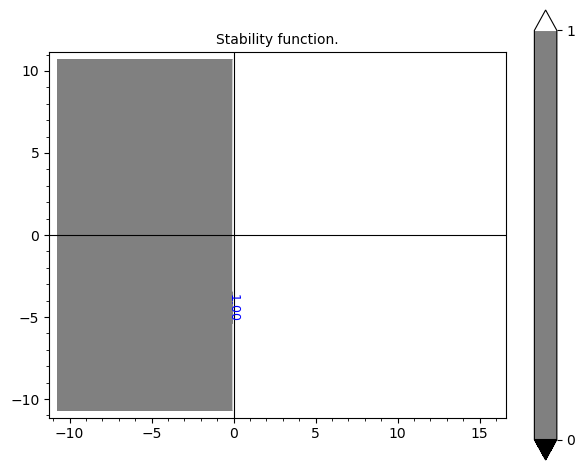

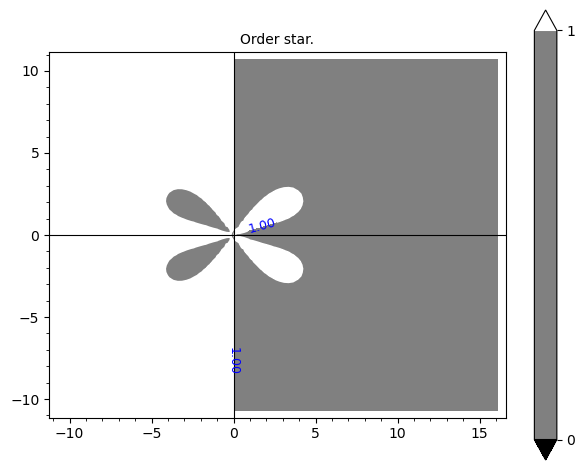


Nom : Chebychev-T-4
A-stable:  True
L-stable:  False
order:  4
stability functions:  (z^4 + 32*z^3 + 320*z^2 + 1536*z + 3072)/(z^4 - 32*z^3 + 320*z^2 - 1536*z + 3072)
stiffly accurate?  False
algebraically stable? False
conserve quadratic invariants? False


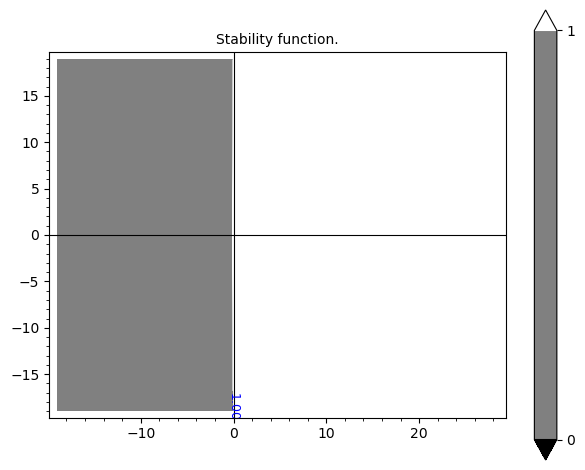

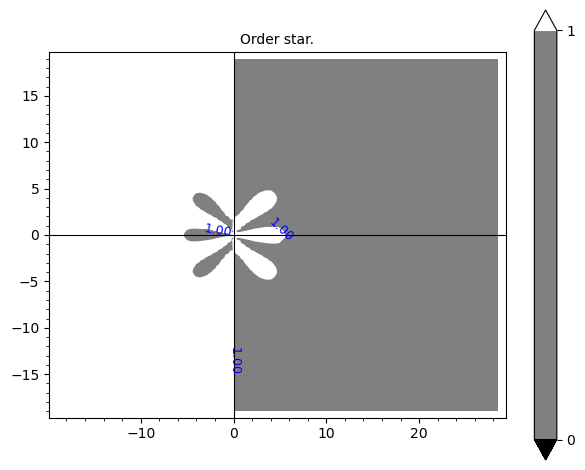

In [3]:
for n in range(3,5):
    c = [(s[0]+1)/2 for s in R(chebyshev_T(n,x)).roots()] #roots of shifted polynomials (collocation points)
    GenRK = RKcolloc.colloc(c,R,"Chebychev-T-"+str(n))# coefficients of the RK formula
    G=GenRK()
    F=RKformula(G)
    #start some tests
    print("\nNom :",G.Title)
    print("A-stable: ",F.is_A_stable())
    print("L-stable: ",F.is_L_stable())
    print("order: ",F.order())
    print("stability functions: ",F.stability_function())
    print("stiffly accurate? ",F.is_stiffly_accurate())
    print("algebraically stable?",F.is_algebraically_stable())
    print("conserve quadratic invariants?",F.conserve_quadratic_invariants())
    p=RKplot(F,fill=True,ncurves=2,Enlarge=1)
    p.show()
    q=RKplot(F,fill=True,ncurves=2,type="star",Enlarge=1)
    q.show()